## MATERNAL HEALTH RISK ANALYSIS
### Student ID - 202125179
### Name - LILIAN FRANCIS

### Importing libraries

In [1]:
#Importing the libraries for data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Data collecting and cleaning

In [2]:
# Reading the data
mhs_df = pd.read_csv('mhs.csv')
#creating a copy
mhs_df_copy = pd.read_csv('mhs.csv')

In [3]:
# Printing the first 5 rows
mhs_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
#printing the last 5 rows
mhs_df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [5]:
#checking information about dataframe
mhs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
#Checking for missing values 
mhs_df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
#check for sum of nan values
mhs_df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [8]:
mhs_df.shape

(1014, 7)

In [9]:
#checking for data type
mhs_df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [10]:
# getting all columns in the data set
df = mhs_df.columns
# looping to check for unique values of each column
for i in mhs_df:
    print(i)
    print(mhs_df[i].unique())

Age
[25 35 29 30 23 32 42 19 20 48 15 50 10 40 21 18 16 22 49 28 12 60 55 45
 31 17 26 54 44 33 13 34 38 39 63 14 37 51 62 43 65 66 56 70 27 36 59 24
 41 46]
SystolicBP
[130 140  90 120  85 110  70 100  75  95  76  80 115 135 160 129  83  99
  78]
DiastolicBP
[ 80  90  70  85  60  89  75 100  50  65  95  49  63  69  76  68]
BS
[15.   13.    8.    7.    6.1   7.01 11.    6.9  18.    6.7   7.5   7.2
  7.1   6.4   9.    6.    7.7  12.   16.    7.8   6.8   7.9  17.   19.
 10.    6.3   6.6   6.5   7.6 ]
BodyTemp
[ 98.  100.  102.  101.  103.   98.4  99.   98.6]
HeartRate
[86 70 80 76 78 77 88 90 66 82 60 75 67 65 68  7]
RiskLevel
['high risk' 'low risk' 'mid risk']


In [11]:
#statistical description of dataset
mhs_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [12]:
#using label encoding to label Risklevel values to numeric values for computation
le = LabelEncoder()

riskLevel = le.fit_transform(mhs_df['RiskLevel'])
mhs_df['RiskLevel'] = riskLevel

In [13]:
#show first 5 rows after encoding
mhs_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [14]:
#statistically describing each column
mhs_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0
RiskLevel,1014.0,1.063116,0.772146,0.0,0.0,1.0,2.0,2.0


### Exploratory Data analysis

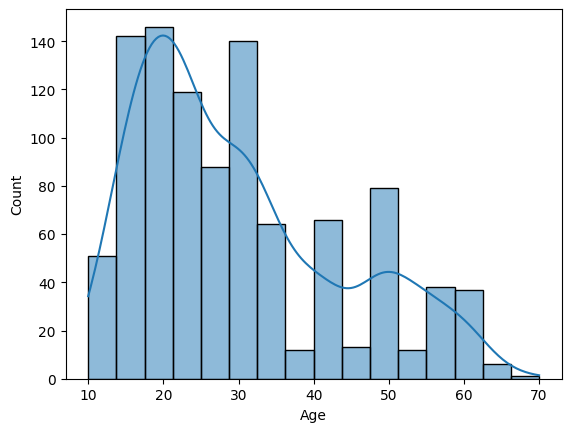

In [15]:
#age distribution plot
sns.histplot(data = mhs_df, x = 'Age', kde=True );

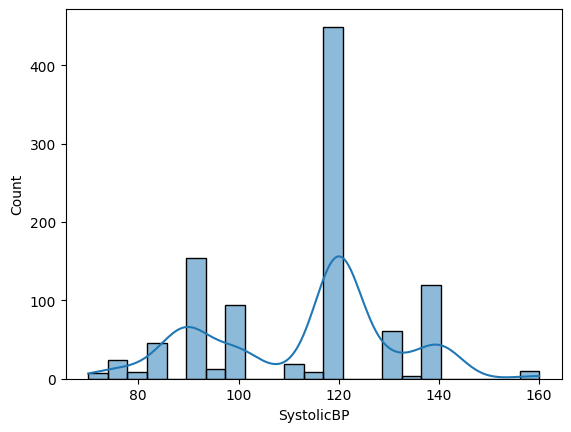

In [16]:
#SystolicBP distribution plot
sns.histplot(data = mhs_df, x = 'SystolicBP', kde=True );

<Axes: xlabel='DiastolicBP', ylabel='Count'>

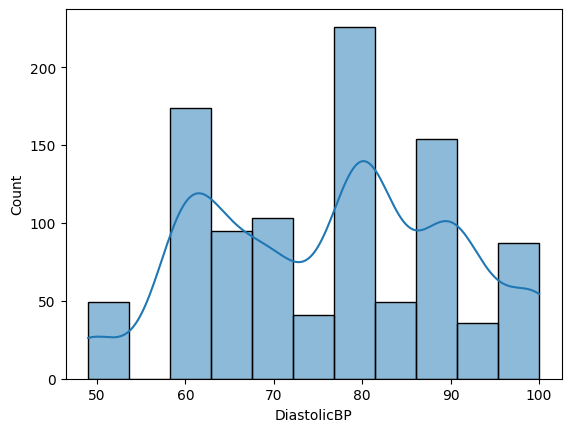

In [17]:
#DiastolicBP distribution plot
sns.histplot(data = mhs_df, x = 'DiastolicBP', kde=True )

<Axes: xlabel='BS', ylabel='Count'>

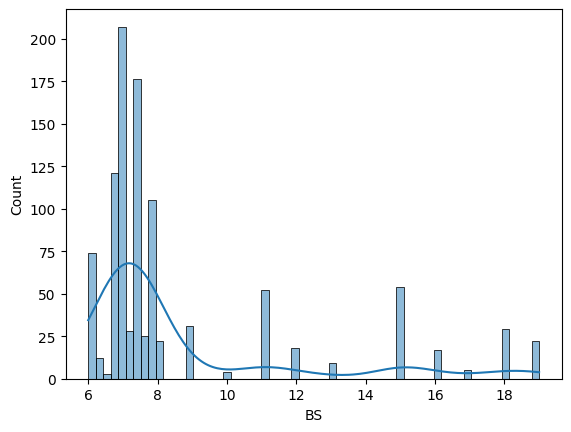

In [18]:
#blood sugar distribution plot
sns.histplot(data = mhs_df, x = 'BS', kde=True )

<Axes: xlabel='BodyTemp', ylabel='Count'>

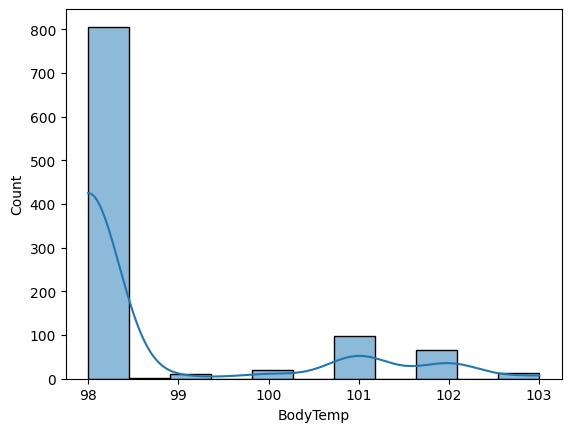

In [19]:
#body temperature distribution plot
sns.histplot(data = mhs_df, x = 'BodyTemp', kde=True )

<Axes: xlabel='HeartRate', ylabel='Count'>

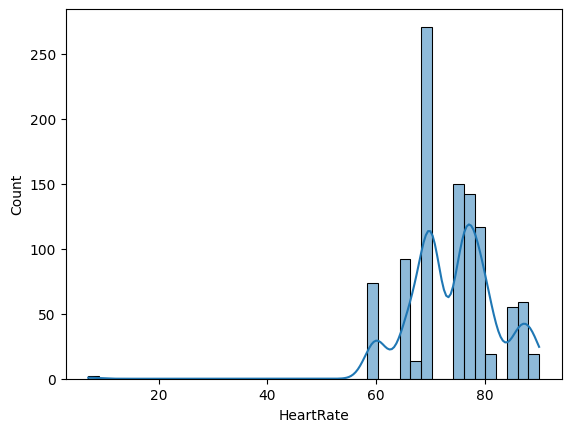

In [20]:
#HeartRate distribution plot
sns.histplot(data = mhs_df, x = 'HeartRate', kde=True )

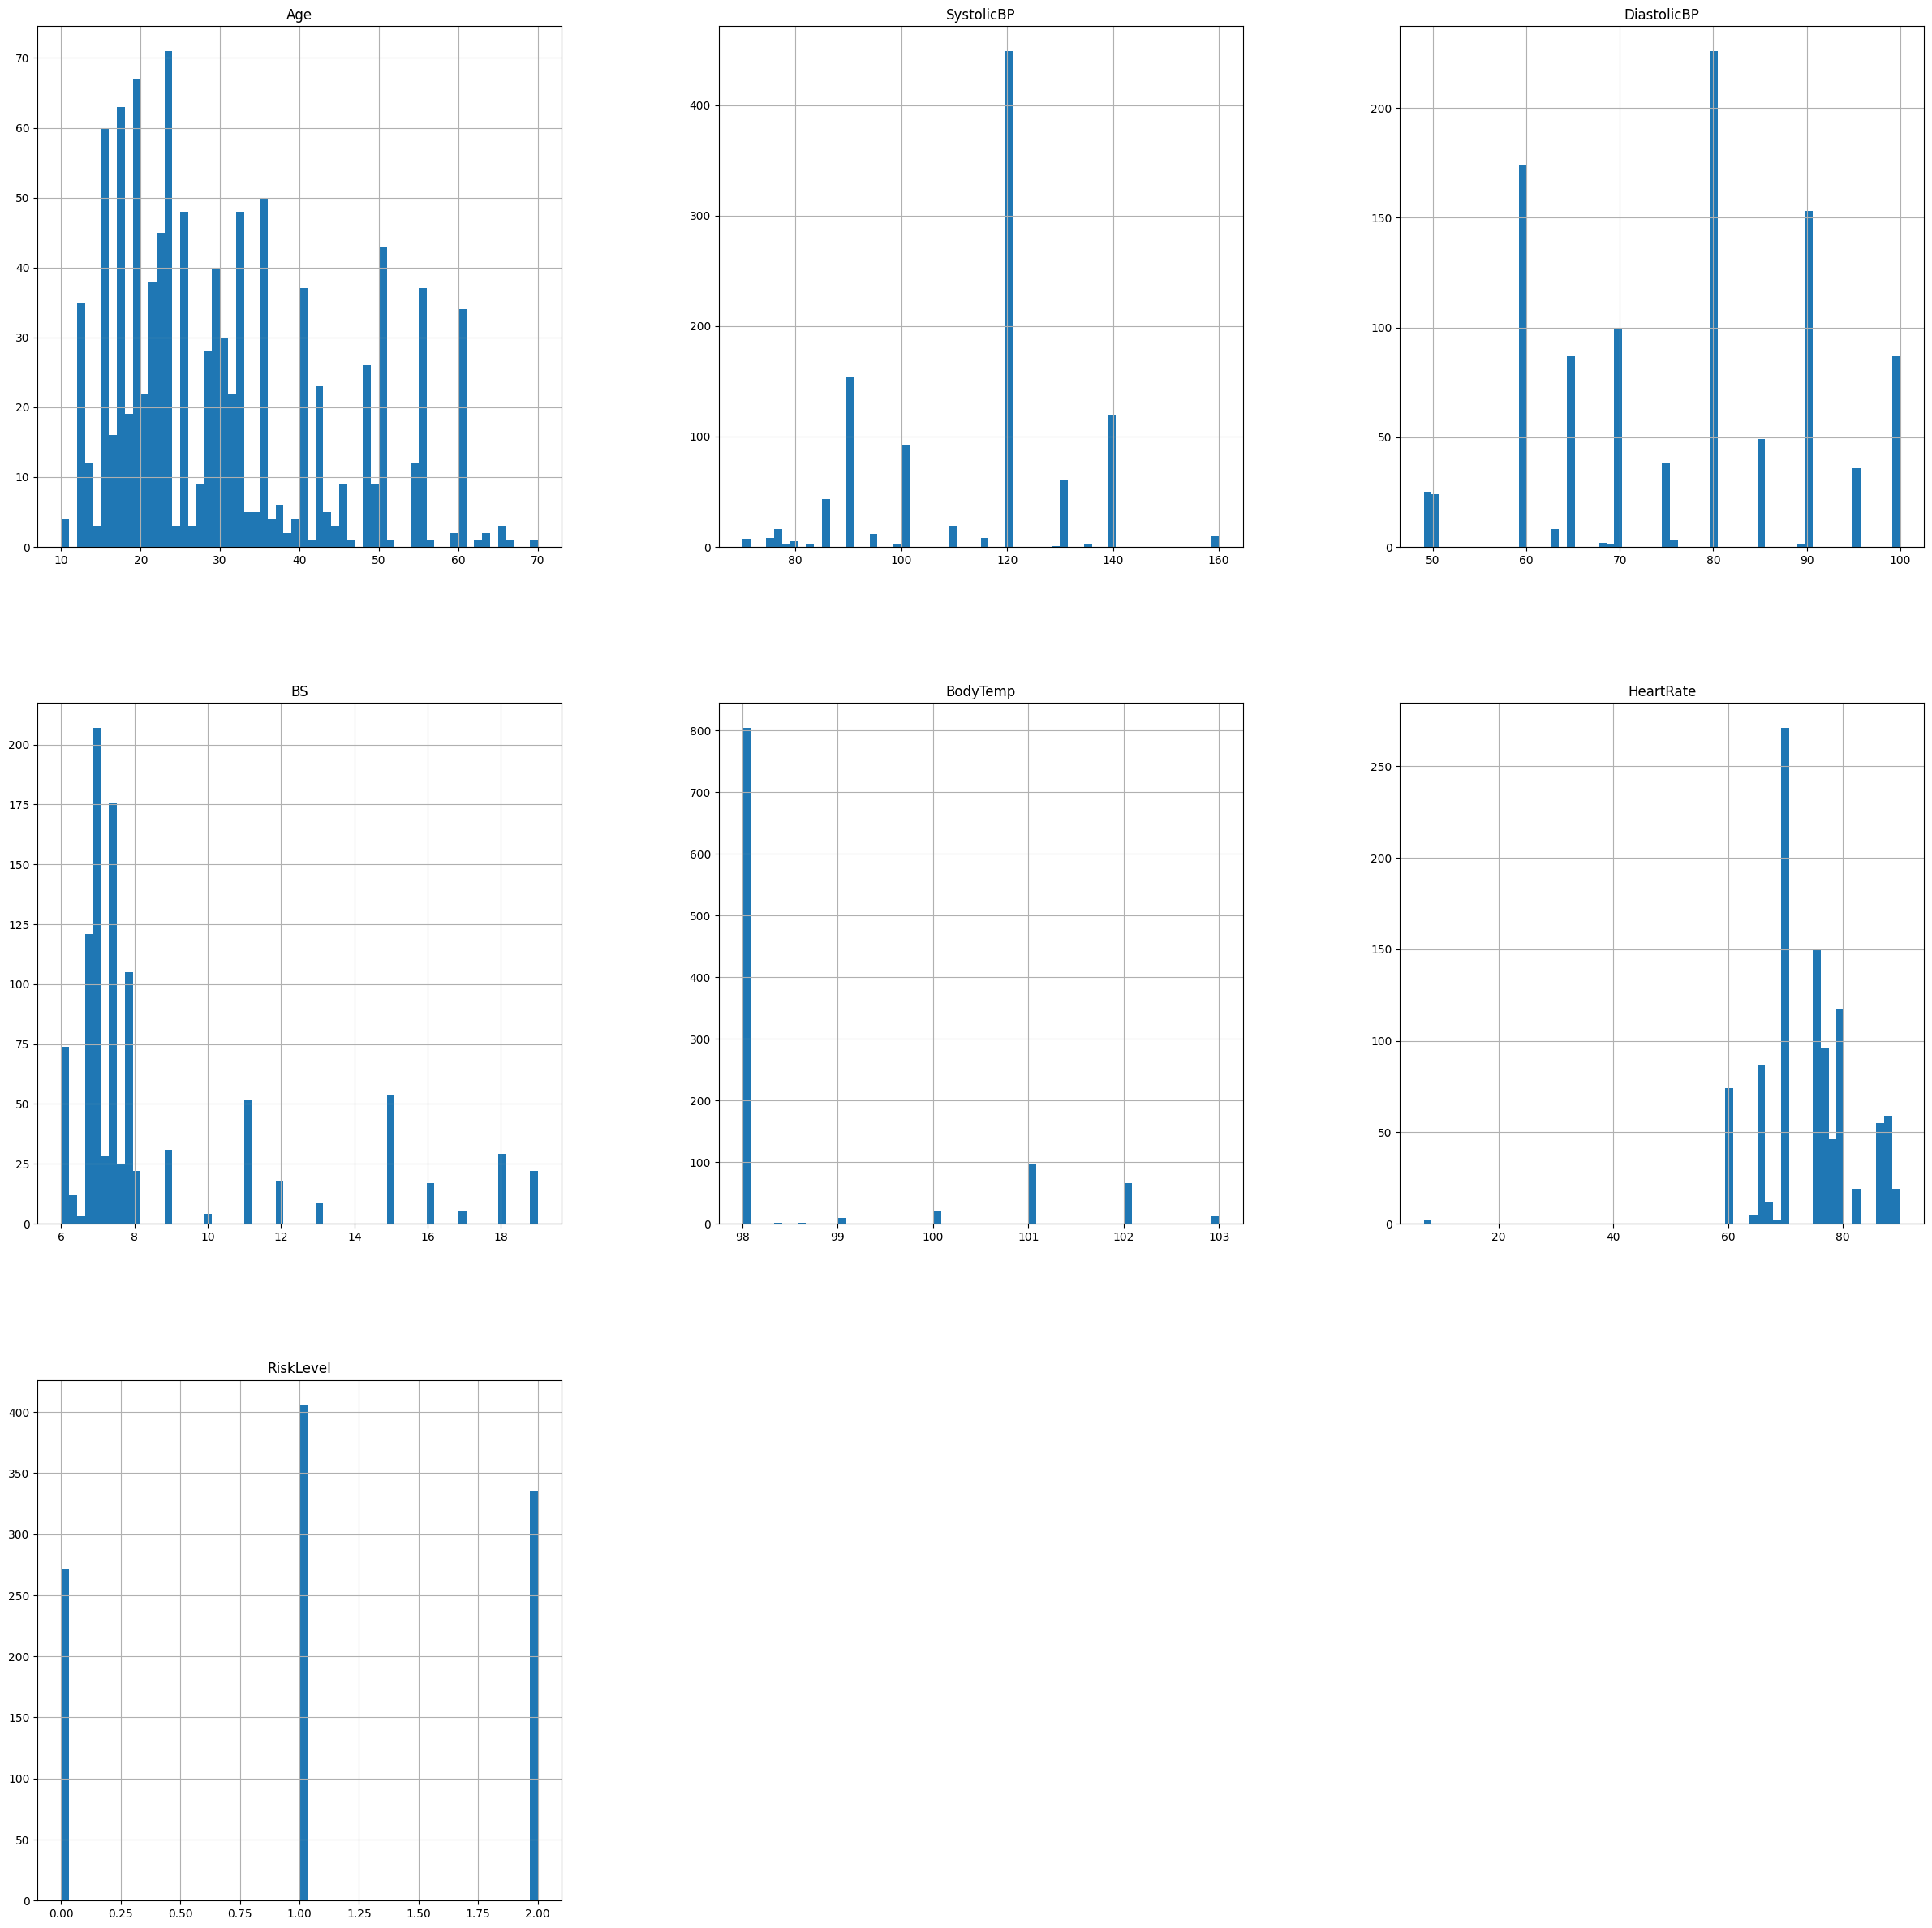

In [21]:
#visualising to show graph representation of each column
%matplotlib inline

mhs_df.hist(bins=60, figsize=(30,30))
#plt.savefig("MHS_df_plots")
plt.show()

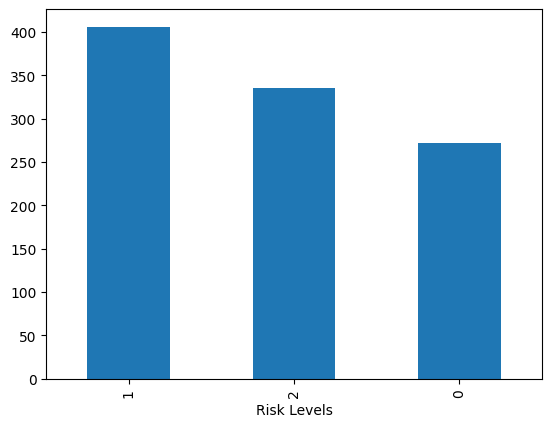

In [23]:
#plot risk level feature
ax = mhs_df['RiskLevel'].value_counts().plot.bar()
ax.set_xlabel('Risk Levels')
plt.show()

<Figure size 1000x1000 with 0 Axes>

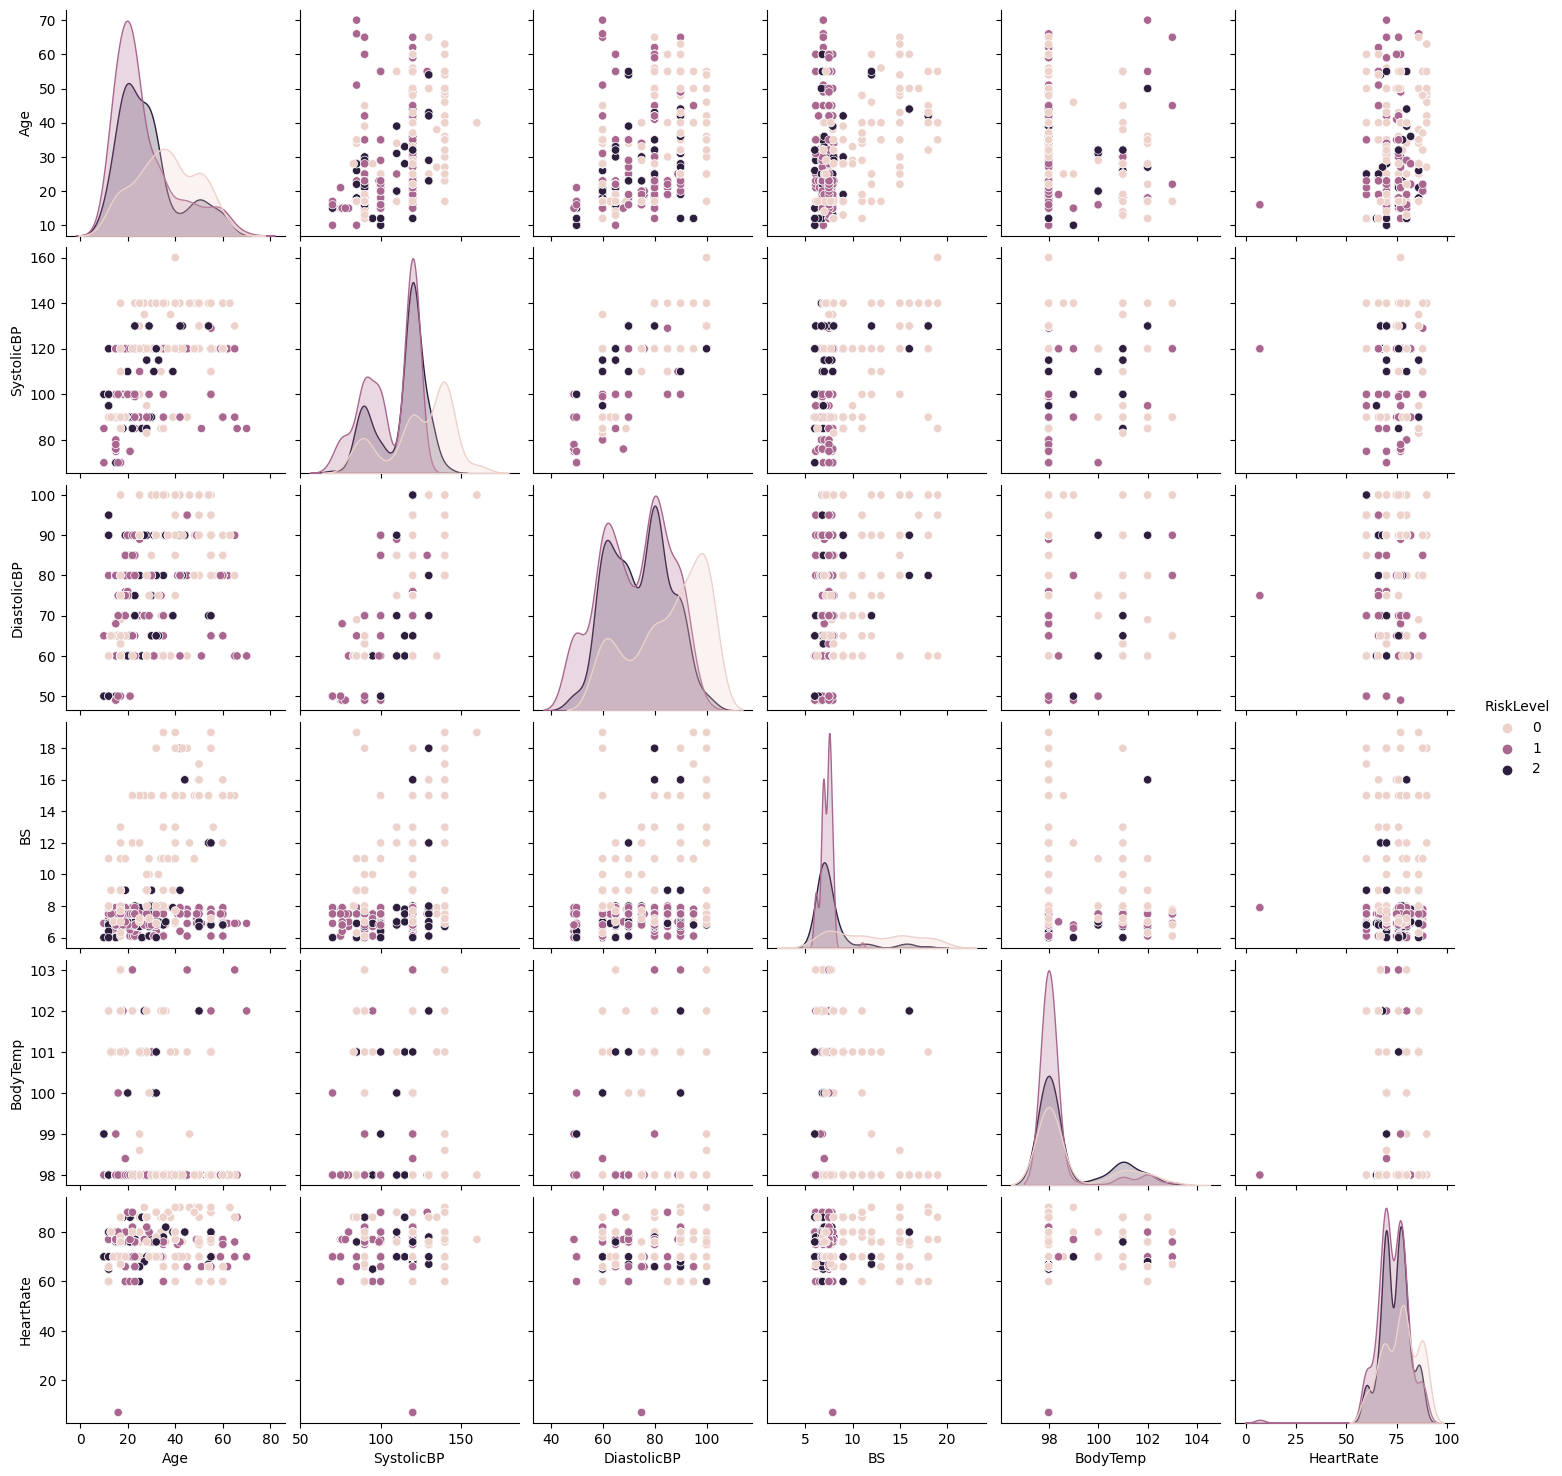

In [24]:
#pairplot relationship with RiskLevel as hue for df
plt.figure(figsize=(10,10))
sns.pairplot(mhs_df, hue='RiskLevel');
plt.show()

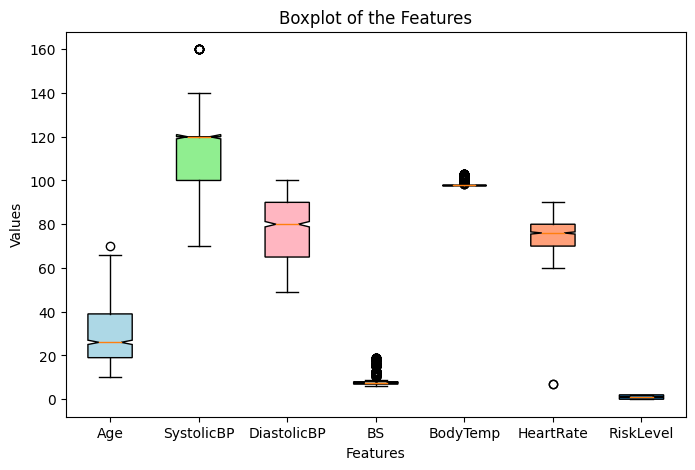

In [26]:
# Plot the boxplot for better visualisation

fig = plt.figure(figsize =(8, 5), dpi=100)
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(mhs_df, patch_artist = True,notch ='True')


# Set the colors of the boxes
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightsalmon']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# x-axis labels
ax.set_xticklabels(mhs_df.columns)

# Add a title and labels
plt.title('Boxplot of the Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

In [27]:
#check for minimum value of heartrate as outlier is noted from the boxplot above
mhs_df.HeartRate.min()

7

In [28]:
#list all rows with heartrate as 7
mhs_df[mhs_df.HeartRate==7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,1
908,16,120,75,7.9,98.0,7,1


In [29]:
#drop rows with outliers
mhs_df.drop(mhs_df[mhs_df.HeartRate==7].index, inplace=True)

In [30]:
mhs_df[mhs_df.HeartRate==7]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


# Question 1: Linear model 

### Linear regression techniques are being used to assess the relationship between variables in the data to understand how different factors influences systolic BP and identify any potential trends or patterns.

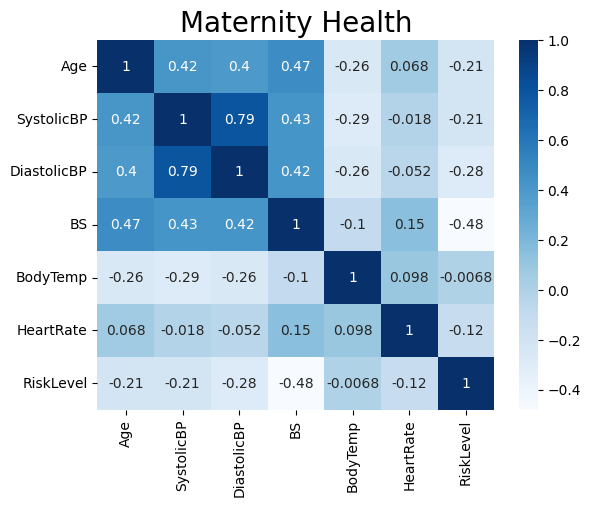

In [31]:
#visualise to see correlation
ax=plt.axes()
sns.heatmap(mhs_df.corr(), cmap='Blues', annot=True)
ax.set_title('Maternity Health', fontsize= 20)
plt.show()

In [32]:
# Define the response variable and the exploratory variables
#removed columns heartrate and bodytemp due to low correlation

X = mhs_df[['Age','DiastolicBP','BS']]
y = mhs_df[['SystolicBP']]
X.head()

,Age,DiastolicBP,BS
0,25,80,15.0
1,35,90,13.0
2,29,70,8.0
3,30,85,7.0
4,35,60,6.1


In [33]:
#view target variables
y.head()

,SystolicBP
0,130
1,140
2,90
3,140
4,120


In [34]:
#import sklearn library and split dataset for modelling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42 )

In [35]:
X_train.shape

(809, 3)

In [36]:
#testing X dataset
X_test.shape

(203, 3)

In [37]:
#instantiate your model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### model evaluation and prediction

In [38]:
#metrics libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [39]:
#evaluate and predict the model using different metrics
y_pred = model.predict(X_test)
print("R squared score of the model is: {:.2f}".format(r2_score(y_test, y_pred)))
print("Mean-squared error of the model is: {:.2f}".format(mean_squared_error(y_test, y_pred)))

model_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root mean-squared of the model is: {:.2f}".format(model_rmse))
print("Mean-absolute error of the model is: {:.2f}".format(mean_absolute_error(y_test, y_pred)))

R squared score of the model is: 0.59
Mean-squared error of the model is: 129.15
Root mean-squared of the model is: 11.36
Mean-absolute error of the model is: 9.10


In [40]:
#join sequence of same dimension arrays along a new axis.
pred_array=np.stack((y_pred, y_test),axis=1)

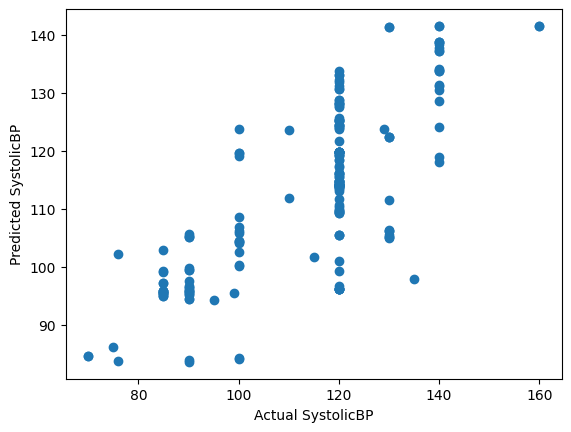

In [41]:
#used to plot data and a linear regression model fit, to compare Predicted VS Actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SystolicBP')
plt.ylabel('Predicted SystolicBP')
plt.show()

# Question 2: Principal Component Analysis (PCA)

### Using the statistical method of PCA, large set of variables can be greatly reduced into smaller sets of variables known as principal components, identifying only the most important variables that explain the majority of the variance in the data. 

In [42]:
#assigning X and y target variables
X = mhs_df.drop(['SystolicBP'], axis=1)
y = mhs_df['SystolicBP']

In [43]:
#standardise dataset
data_scaler = StandardScaler()
X_scaled = data_scaler.fit_transform(X)

# Create a PCA object and fit the scaled data
pca = PCA()  # choose the number of components you want to keep
pca.fit(X_scaled)

# Transform the data to the new feature space
pca_data = pca.transform(X_scaled)


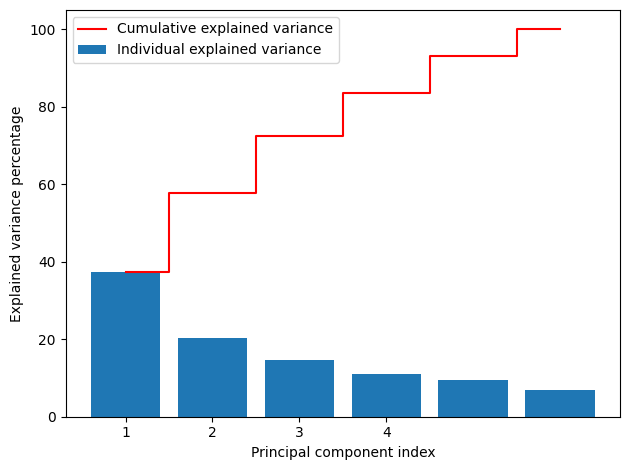

In [44]:
#visualise variance percentage when applied PCA
exp_variance = pca.explained_variance_ratio_ * 100
cum_exp_variance = np.cumsum(exp_variance)
num_components = pca.components_.shape[0]

plt.bar(range(1, num_components+1), exp_variance, label='Individual explained variance')
plt.step(range(1, num_components+1), cum_exp_variance, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("PCABarplot.png")
plt.show()

In [45]:
# The plot above shows that about 80% of the variance is captured by three principal components
# Therefore for optimum performance our n_components is set at 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Principal components derived are housed in a dataframe
pca_df = pd.DataFrame(X_pca, columns = ['PC1', 'PC2', 'PC3'])

pca_df

,PC1,PC2,PC3
0,1.805484,1.542191,-0.448551
1,1.985969,-0.159554,0.961240
2,0.029798,1.628697,0.397342
3,0.643521,-0.397186,0.818734
4,-0.651342,-0.079567,-0.684960
...,...,...,...
1007,0.927319,1.410007,-0.023480
1008,3.408278,-0.873405,1.711414
1009,2.131203,2.017439,-0.723890
1010,3.098679,0.068269,0.964934


### build and evaluate linear model using PCA data

In [46]:
#split your dataset
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split (pca_df, y, test_size=0.2, random_state=42 )

In [47]:
#to use our new df to fit the model
model = LinearRegression()

# Fit the model to the data
model.fit(X_pca_train, y_pca_train)

LinearRegression()

In [48]:
## prediction and evaluation for pca df
pca_pred = model.predict(X_pca_test)

#evaluation
print("R squared score of the test set is: {:.2f}".format(r2_score(y_pca_test, pca_pred)))
print("Mean-squared error of the test set is: {:.2f}".format(mean_squared_error(y_pca_test, pca_pred)))

model_rmse = np.sqrt(mean_squared_error(y_pca_test, pca_pred))
print("Root mean-squared of the test set is: {:.2f}".format(model_rmse))
print("Mean-absolute error of the test set is: {:.2f}".format(mean_absolute_error(y_pca_test, pca_pred)))

R squared score of the test set is: 0.45
Mean-squared error of the test set is: 172.41
Root mean-squared of the test set is: 13.13
Mean-absolute error of the test set is: 10.74


# Question 3:  Age by heart rate relationship using age-grouping

### By categorising the data into different age ranges and computing the mean heart rate for each group, it's easy to study the association between age and heart rate. 

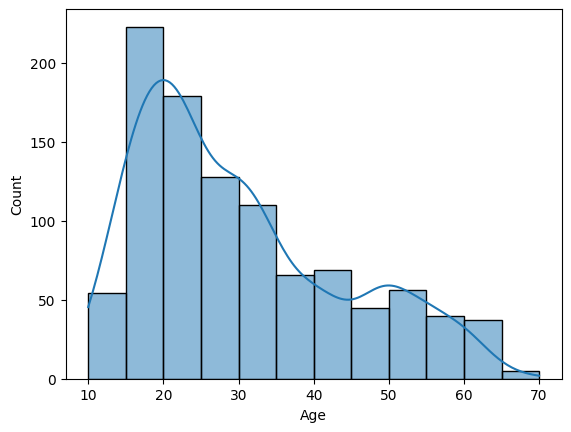

In [49]:
#histplot allows modifications and one can see data distributed in several ways.
#show distribution for age alone
Age_plot1 =  sns.histplot(mhs_df, x = 'Age', binwidth = 5, kde = True)
#Age_plot1.savefig('./Age_plot1.png')

In [50]:
#function for grouping our age for further analysis
#http://healthsurvey.hscic.gov.uk/data-visualisation/data-visualisation/explore-the-trends/high-blood-pressure.aspx
def age_group(age):
    if age < 16:
        return '0 - 15'
    elif age < 25:
        return '16 - 24'
    elif age < 45:
        return '25 - 44'
    elif age < 65:
        return '45 - 64'
    else:
        return '65+'

In [51]:
#replacing Age class by applying the above function to Age
mhs_df['Age_group'] = mhs_df['Age'].apply(age_group)

<Axes: xlabel='Age_group', ylabel='Count'>

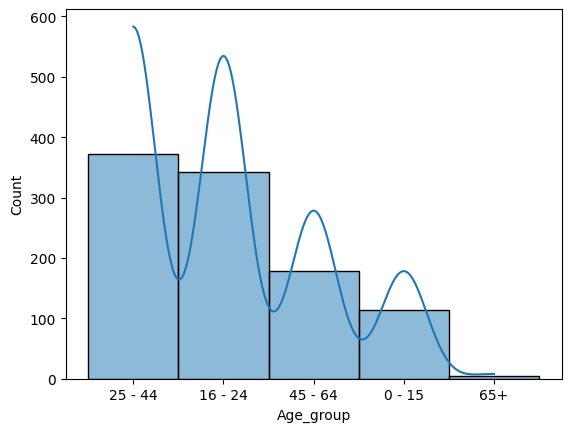

In [52]:
#visualise age-group distribution plot
sns.histplot(data = mhs_df, x = 'Age_group', kde=True )

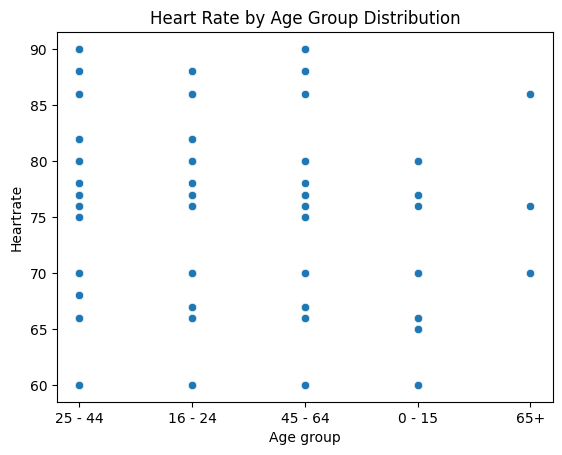

In [53]:
#show distribution between age-group and heartrate before mean
#Each point represents an individual in the dataset,
sns.scatterplot(data=mhs_df, x='Age_group', y='HeartRate')
plt.title('Heart Rate by Age Group Distribution')
plt.xlabel('Age group')
plt.ylabel('Heartrate')
plt.show()

In [54]:
#show new df
mhs_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_group
0,25,130,80,15.0,98.0,86,0,25 - 44
1,35,140,90,13.0,98.0,70,0,25 - 44
2,29,90,70,8.0,100.0,80,0,25 - 44
3,30,140,85,7.0,98.0,70,0,25 - 44
4,35,120,60,6.1,98.0,76,1,25 - 44
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0,16 - 24
1010,55,120,90,18.0,98.0,60,0,45 - 64
1011,35,85,60,19.0,98.0,86,0,25 - 44
1012,43,120,90,18.0,98.0,70,0,25 - 44


In [55]:
#get the average heart rate per age-group
heartrate_df=mhs_df[['Age_group','HeartRate']].groupby('Age_group').mean()
heartrate_df

,HeartRate
Age_group,
0 - 15,72.508772
16 - 24,73.438596
25 - 44,75.635389
45 - 64,74.977528
65+,77.600000


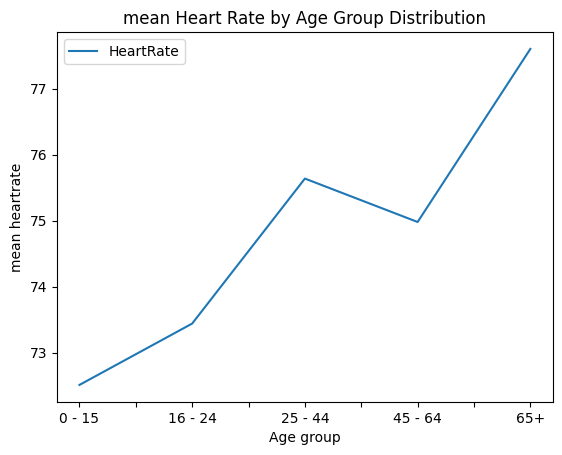

In [56]:
#visualise heartrate by age
heartrate_df.plot()
plt.ylabel('mean heartrate')
plt.xlabel('Age group')
plt.title('mean Heart Rate by Age Group Distribution')
plt.show()

# Question 4: Association rule mining

### The measures of association between the categories high/high, normal/normal, and low/low, using rules of support, confidence, conviction, and lift, were computed, and analyzed to better understand the relationships between the various blood pressure categories.

### There is a high correlation between BS and Diastolic BP and Systolic BP. BS levels are related to Age, Systolic and Diastolic as variables increase. The risk to have a high level of glucose in blood can also be related to lifestyle change in different age groups

In [57]:
#importing libraries
from mlxtend.frequent_patterns import apriori, association_rules

In [58]:
#create df to select both BP columns systolic and diastolic
sys_dia_df=mhs_df[['SystolicBP','DiastolicBP']]

In [59]:
#creating bins for systolic and diastolic
bins = ['low','normal','high']
sys_bins= [0, 110, 140, 200]
dias_bins= [0, 70, 90, 200]

sys_dia_df['systolicBp'] = pd.cut(sys_dia_df['SystolicBP'], bins=sys_bins, labels=bins, right=False)
sys_dia_df['diastolicBp'] = pd.cut(sys_dia_df['DiastolicBP'], bins=dias_bins, labels=bins, right=False)

sys_dia_df = sys_dia_df[['systolicBp','diastolicBp']]
sys_dia_df

,systolicBp,diastolicBp
0,normal,normal
1,high,high
2,low,normal
3,high,normal
4,normal,low
...,...,...
1009,normal,low
1010,normal,high
1011,low,low
1012,normal,high


In [60]:
#converting the categorical data into indicator variables using .get_dummies method
sys_dia_df = pd.get_dummies(sys_dia_df)
sys_dia_df

,systolicBp_low,systolicBp_normal,systolicBp_high,diastolicBp_low,diastolicBp_normal,diastolicBp_high
0,0,1,0,0,1,0
1,0,0,1,0,0,1
2,1,0,0,0,1,0
3,0,0,1,0,1,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
1009,0,1,0,1,0,0
1010,0,1,0,0,0,1
1011,1,0,0,1,0,0
1012,0,1,0,0,0,1


In [61]:
#using apriori library to generate itemsets for the associations
itemsets = apriori(sys_dia_df, min_support=0.0001, use_colnames=True)
itemsets

C:\Users\HOME\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.339921,(systolicBp_low)
1,0.531621,(systolicBp_normal)
2,0.128458,(systolicBp_high)
3,0.317194,(diastolicBp_low)
4,0.410079,(diastolicBp_normal)
5,0.272727,(diastolicBp_high)
6,0.266798,"(diastolicBp_low, systolicBp_low)"
7,0.063241,"(systolicBp_low, diastolicBp_normal)"
8,0.009881,"(systolicBp_low, diastolicBp_high)"
9,0.050395,"(diastolicBp_low, systolicBp_normal)"


In [62]:
#generate association rules from itemsets
rules = association_rules(itemsets, metric='support', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(diastolicBp_low),(systolicBp_low),0.317194,0.339921,0.266798,0.841121,2.474462,0.158978,4.154615,0.872680
1,(systolicBp_low),(diastolicBp_low),0.339921,0.317194,0.266798,0.784884,2.474462,0.158978,3.174127,0.902728
2,(systolicBp_low),(diastolicBp_normal),0.339921,0.410079,0.063241,0.186047,0.453685,-0.076153,0.724760,-0.645929
3,(diastolicBp_normal),(systolicBp_low),0.410079,0.339921,0.063241,0.154217,0.453685,-0.076153,0.780435,-0.671188
4,(systolicBp_low),(diastolicBp_high),0.339921,0.272727,0.009881,0.029070,0.106589,-0.082824,0.749047,-0.926998
5,(diastolicBp_high),(systolicBp_low),0.272727,0.339921,0.009881,0.036232,0.106589,-0.082824,0.684894,-0.920160
6,(diastolicBp_low),(systolicBp_normal),0.317194,0.531621,0.050395,0.158879,0.298857,-0.118231,0.556851,-0.774569
7,(systolicBp_normal),(diastolicBp_low),0.531621,0.317194,0.050395,0.094796,0.298857,-0.118231,0.754312,-0.833581
8,(diastolicBp_normal),(systolicBp_normal),0.410079,0.531621,0.333992,0.814458,1.532028,0.115986,2.524383,0.588673
9,(systolicBp_normal),(diastolicBp_normal),0.531621,0.410079,0.333992,0.628253,1.532028,0.115986,1.586887,0.741430


# Question 5: Clustering for systolic BP patients

### KMeans was used as a clustering technique to identify clusters of patients with similar systolic BP values. The k-means clustering algorithm uses the elbow approach to get the ideal number of clusters (k) and we would deduce the value of k from the graph produced. 

In [63]:
#importing library
from sklearn.cluster import KMeans

In [64]:
mhs_df[['SystolicBP']]

,SystolicBP
0,130
1,140
2,90
3,140
4,120
...,...
1009,120
1010,120
1011,85
1012,120


In [65]:
#feauture variable
X =mhs_df[['SystolicBP']]
X
#X = X.reshape(-1, 1)

,SystolicBP
0,130
1,140
2,90
3,140
4,120
...,...
1009,120
1010,120
1011,85
1012,120


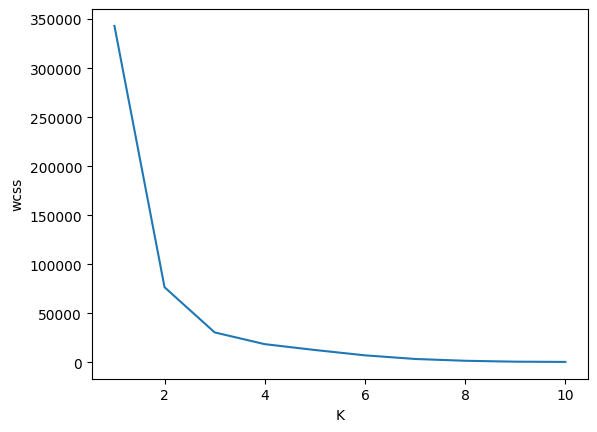

In [66]:
#obtain optimum number of clusters (K) using Elbow method 
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(mhs_df[['SystolicBP']])
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.ylabel('wcss')
plt.xlabel('K')
plt.show()

In [67]:
#cluster the systolicBP data points into 3 using the k-means algorithm
km = KMeans(n_clusters=3, random_state=42)
mhs_df['cluster'] = km.fit_predict(mhs_df[['SystolicBP']])


In [78]:
#plotting a 3d version of the clusters of systolicBP
import plotly.express as px
# Customize labels and title
fig = px.scatter_3d(mhs_df, x='SystolicBP', y='SystolicBP', z='cluster', color='cluster',  title='3D Scatter Plot', symbol='cluster')
fig.show()

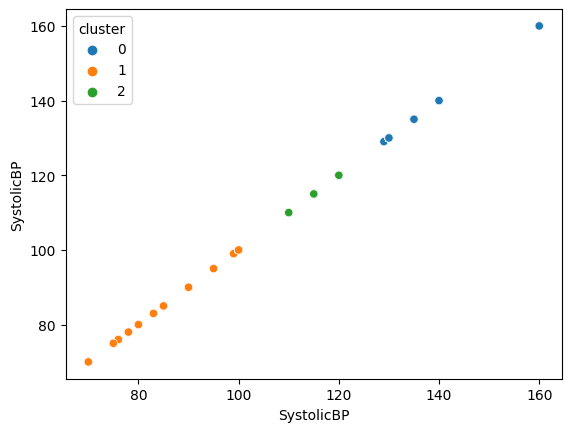

In [79]:
#visualize clusters basic
sns.scatterplot(data=mhs_df, x=mhs_df['SystolicBP'], y=mhs_df['SystolicBP'], hue=mhs_df['cluster'], palette='tab10');

# Question 6: Correlation between age and systolic BP

### To determine and understand the degree of the association, the correlation between age and systolic blood pressure will be evaluated. A correlation's coefficients range from -1 to 1, and it measures the linear relationship between any two variables

In [80]:
#importing libraries
from scipy.stats import pearsonr

In [81]:
#view age and systolicbp columns
mhs_df[['SystolicBP','Age']]

,SystolicBP,Age
0,130,25
1,140,35
2,90,29
3,140,30
4,120,35
...,...,...
1009,120,22
1010,120,55
1011,85,35
1012,120,43


In [82]:
#Pearson correlation coefficient measures the strength and direction of the linear relationship between the two variables.
pearson_values = pearsonr(mhs_df['Age'], mhs_df['SystolicBP'])
corr = pearson_values[0]
p_value = pearson_values[1]

print(f'correlation coefficient:{corr}\t p-value:{p_value}')

correlation coefficient:0.4172921436670312	 p-value:6.559904051449056e-44


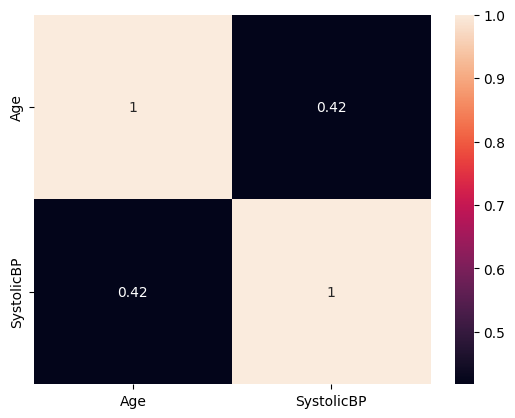

In [83]:
#visualise correlation map
sns.heatmap(mhs_df[['Age', 'SystolicBP']].corr(), annot=True);